In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [3]:
df = pd.read_csv(r"E:\Downloads\step_1_lesson_7.csv")
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<AxesSubplot:xlabel='date', ylabel='visits'>

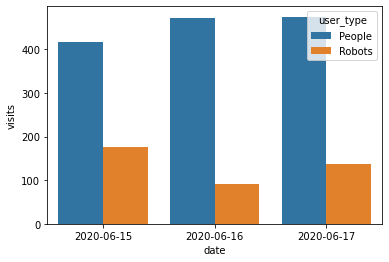

In [7]:
sns.barplot(x=df.date, y=df.visits, hue=df.user_type)

## Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [8]:
df2 = pd.read_csv(r"E:\Downloads\step_2_lesson_7.csv")

In [9]:
df2.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [10]:
df2.browser.unique()

array(['Google Chrome', 'Firefox', 'Yandex Browser', 'Safari',
       'Chrome Mobile', 'Opera', 'Mobile Safari', 'Samsung Internet',
       'Edge', 'UCWEB', 'Chromium', 'Android Browser',
       'Yandex: mobile app', 'Vivaldi', 'CocCoc'], dtype=object)

In [15]:
round(df2.query("browser == 'Google Chrome'").visits / df2.visits.sum() * 100)

0    60.0
Name: visits, dtype: float64

In [13]:
df2.visits.sum()

594.0

## Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [41]:
df3 = pd.read_csv(r"E:\Downloads\step_3_lesson_7.csv")

In [42]:
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [43]:
df3_sum = df3.groupby('browser', as_index=False) \
            .agg({'visits': 'sum'}) \
            .rename(columns={"visits": 'all_visits'})

In [47]:
df3_all = df3.merge(df3_sum, on='browser')
df3_all.head()

,date,browser,user_type,visits,all_visits
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0


In [48]:
df3_all['bots_visits'] = df3_all.visits / df3_all.all_visits

In [51]:
df3_all.sort_values('bots_visits').query('user_type == "Robots"').tail(10)

,date,browser,user_type,visits,all_visits,bots_visits
10,2020-06-15,Mobile Safari,Robots,1.0,16.0,0.062500
14,2020-06-15,Samsung Internet,Robots,1.0,9.0,0.111111
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630
17,2020-06-15,Edge,Robots,1.0,5.0,0.200000
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
12,2020-06-15,Opera,Robots,5.0,16.0,0.312500
20,2020-06-15,Chromium,Robots,1.0,2.0,0.500000
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483
7,2020-06-15,Safari,Robots,22.0,41.0,0.536585
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.000000


In [57]:
df3_pivot = df3.pivot(index='browser', columns='user_type', values='visits').reset_index().fillna(0)

In [59]:
df3_pivot['percent'] = df3_pivot.Robots / (df3_pivot.People + df3_pivot.Robots)

In [61]:
df3_pivot.sort_values('percent', ascending=False)

user_type,browser,People,Robots,percent
11,UCWEB,0.0,4.0,1.000000
9,Safari,19.0,22.0,0.536585
5,Firefox,27.0,31.0,0.534483
2,Chromium,1.0,1.0,0.500000
8,Opera,11.0,5.0,0.312500
6,Google Chrome,250.0,104.0,0.293785
4,Edge,4.0,1.0,0.200000
13,Yandex Browser,47.0,7.0,0.129630
10,Samsung Internet,8.0,1.0,0.111111
7,Mobile Safari,15.0,1.0,0.062500


## Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [68]:
df4 = pd.read_csv(r"E:\Downloads\step_4_lesson_7.csv")
df4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [65]:
df4.date.unique()

array(['2020-06-15'], dtype=object)

In [74]:
df4['proportion'] = (df4.visits / df4.visits.sum() * 100).round(1)

In [75]:
df4.query('browser == "Safari"')

,date,browser,user_type,visits,proportion
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2


## Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [76]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [77]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [78]:
df4

,date,browser,user_type,visits,proportion
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [80]:
df_final = df.merge(df4, on=['date', 'browser', 'user_type'])

**посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.**

In [81]:
df_final.head()

,date,browser,user_type,users,visits,proportion
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2


In [85]:
df_final['visits/users'] = df_final.visits / df_final.users

In [86]:
df_final.head()

,date,browser,user_type,users,visits,proportion,visits/users
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9,1.068182
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2,1.033333
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2,1.068966
